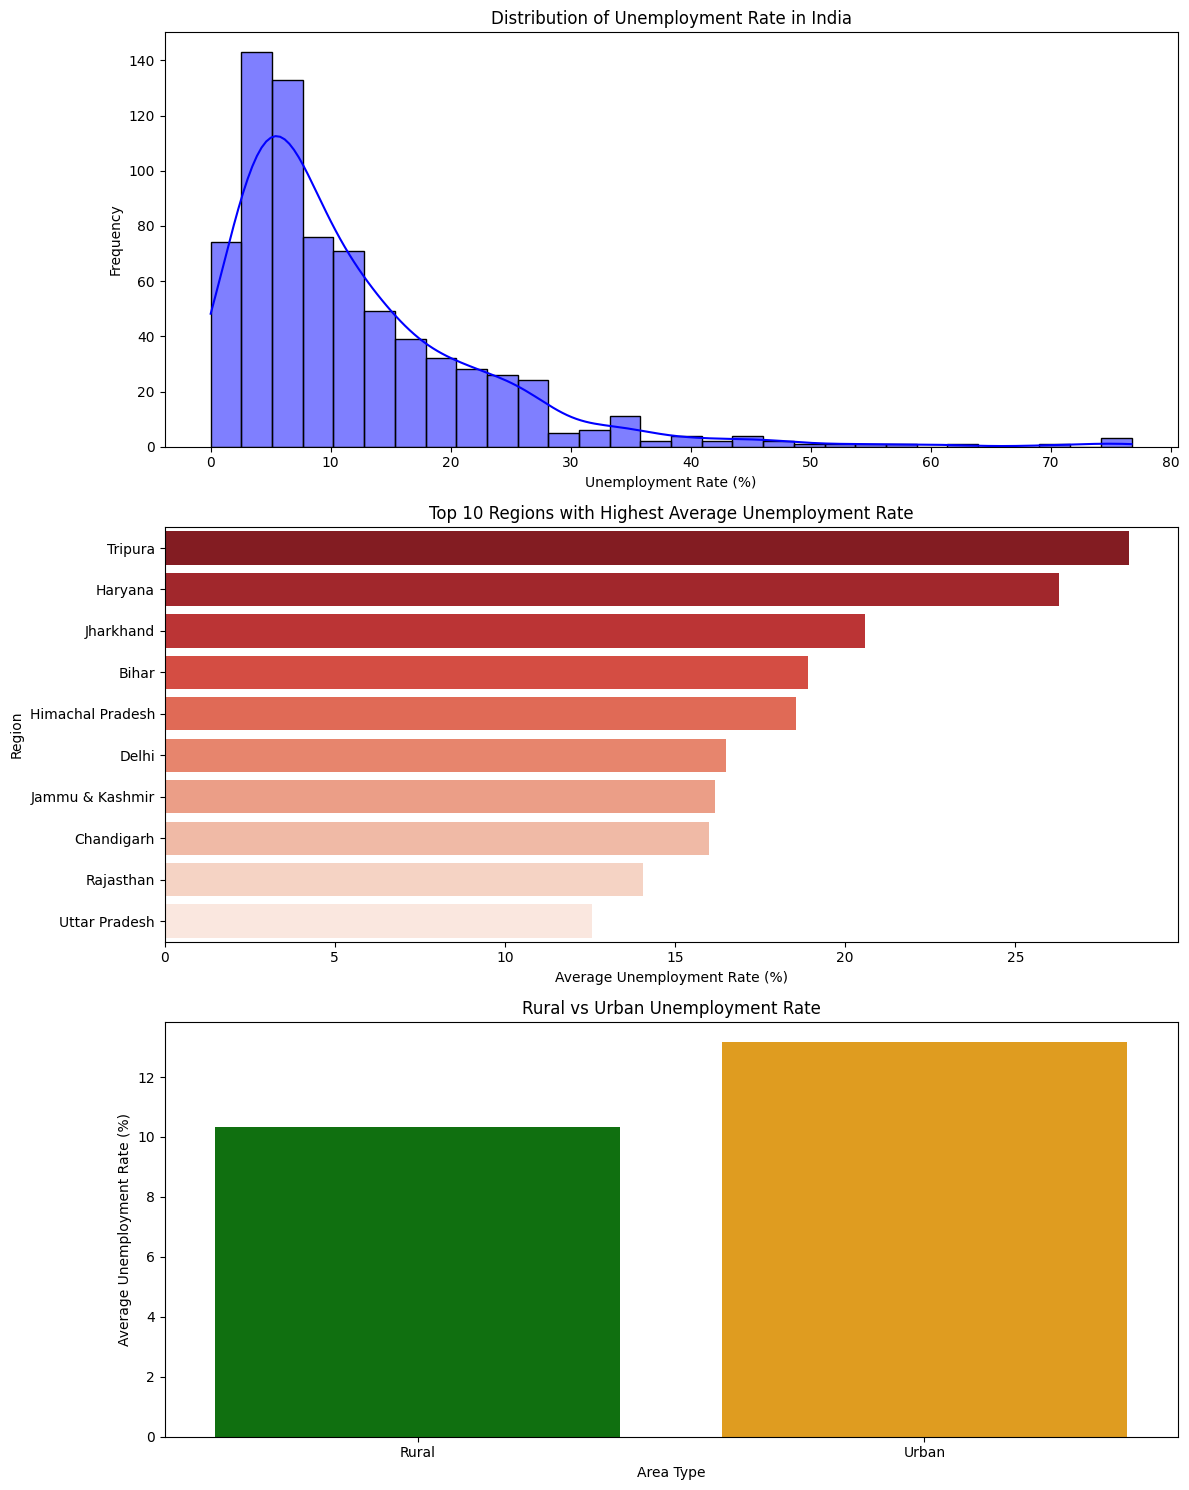

Summary Statistics:
 count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name: Estimated Unemployment Rate (%), dtype: float64

Region with Highest Unemployment: Tripura
Region with Lowest Unemployment: Meghalaya

Rural vs Urban Unemployment:
 Area
Rural    10.324791
Urban    13.166614
Name: Estimated Unemployment Rate (%), dtype: float64


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "Unemployment in India.csv"  # Update with the correct path
df = pd.read_csv(file_path)

# Data Cleaning
df_cleaned = df.dropna().copy()  # Copy to avoid SettingWithCopyWarning
df_cleaned.columns = df_cleaned.columns.str.strip()
df_cleaned.loc[:, 'Date'] = df_cleaned['Date'].str.strip()
df_cleaned.loc[:, 'Date'] = pd.to_datetime(df_cleaned['Date'], format='%d-%m-%Y')

# Summary Statistics
unemployment_stats = df_cleaned["Estimated Unemployment Rate (%)"].describe()

# Regional Analysis
region_avg_unemployment = df_cleaned.groupby("Region")["Estimated Unemployment Rate (%)"].mean()
highest_unemployment_region = region_avg_unemployment.idxmax()
lowest_unemployment_region = region_avg_unemployment.idxmin()

# Rural vs. Urban Comparison
area_avg_unemployment = df_cleaned.groupby("Area")["Estimated Unemployment Rate (%)"].mean()

# Set up figure layout
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# 1. Distribution of Unemployment Rate
sns.histplot(df_cleaned["Estimated Unemployment Rate (%)"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Unemployment Rate in India")
axes[0].set_xlabel("Unemployment Rate (%)")
axes[0].set_ylabel("Frequency")

# 2. Regional Comparison - Top 10 Unemployment Rates
top_regions = region_avg_unemployment.sort_values(ascending=False).head(10)
sns.barplot(x=top_regions.values, y=top_regions.index, ax=axes[1], hue=top_regions.index, palette="Reds_r", legend=False)
axes[1].set_title("Top 10 Regions with Highest Average Unemployment Rate")
axes[1].set_xlabel("Average Unemployment Rate (%)")
axes[1].set_ylabel("Region")

# 3. Rural vs Urban Unemployment Comparison
sns.barplot(x=area_avg_unemployment.index, y=area_avg_unemployment.values, ax=axes[2], hue=area_avg_unemployment.index, palette=["green", "orange"], legend=False)
axes[2].set_title("Rural vs Urban Unemployment Rate")
axes[2].set_xlabel("Area Type")
axes[2].set_ylabel("Average Unemployment Rate (%)")

plt.tight_layout()
plt.show()

# Print Key Insights
print("Summary Statistics:\n", unemployment_stats)
print("\nRegion with Highest Unemployment:", highest_unemployment_region)
print("Region with Lowest Unemployment:", lowest_unemployment_region)
print("\nRural vs Urban Unemployment:\n", area_avg_unemployment)
